# 功能测试

In [8]:
start = '2018-05-30'
end = '2018-06-03'

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pprint as pp
import os
import pandas as pd
import numpy as np
from datetime import datetime,timedelta, date

%matplotlib inline 

In [40]:

start_day = datetime.strptime(start,"%Y-%m-%d").date()
end_day = datetime.strptime(end,"%Y-%m-%d").date()
# print(start_day)
# print(end_day)


def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

date_list = [dt.strftime("%Y%m%d") for dt in daterange(start_day, end_day)]
# pp.pprint(date_list)

In [11]:
date_str = '|'.join(date_list)
# print(date_str)

In [12]:
pp = pp.PrettyPrinter()

path = "./功能测试 logs/功能测试*.log"

In [13]:
# get all files in folder
path_files = glob.glob(path)
files = [os.path.basename(f) for f in path_files]
# pp.pprint(files)

In [14]:
filter_path_files = []

for path_file in path_files:
    for date in date_list:
        if path_file.find(date) != -1:
            filter_path_files.append(path_file)
            break;


pp.pprint(filter_path_files)

['./功能测试 logs\\功能测试 20180530.log',
 './功能测试 logs\\功能测试 20180531.log',
 './功能测试 logs\\功能测试 20180601.log',
 './功能测试 logs\\功能测试 20180601.log功能测试 20180601.log',
 './功能测试 logs\\功能测试 20180602.log',
 './功能测试 logs\\功能测试 20180603.log']


In [15]:
# with open(path_files[0], 'r') as text_file:
#     text = text_file.read().splitlines()
#     pp.pprint(text[:5])

In [16]:
# print('lines:', len(text))

In [17]:
# words = text[0].split(' : ')[1].split('; ')
# pp.pprint(words)

In [18]:
# titles = [word.split(":")[0] for word in words]
# values = [word.split(":")[1] for word in words]
# pp.pprint(titles)
# pp.pprint(values)

In [19]:
texts = []
for path_file in filter_path_files:
    with open(path_file, 'r') as text_file:
        texts.append(text_file.read().splitlines())
    
lines = []
for text in texts:
    for line in text:
        line_value = line.split(' : ')[1].split('; ')
        word_values = [word.split(":")[1] for word in line_value]
        lines.append(word_values)

# pp.pprint(lines[:5])
# pp.pprint(len(lines))

In [37]:
first_line = texts[0][0].split(' : ')[1].split('; ')
# print(first_line)
# print()

titles = [key_value.split(':')[0] for key_value in first_line]
# print(titles)

In [21]:
datas = pd.DataFrame(lines)
datas.columns = titles
# datas.head()

In [22]:
# _= datas.info()

In [38]:
plt.rcParams['font.sans-serif']=['SimHei']
r_count = datas.groupby(['测试结果'])['Id'].count()
# r_count

In [39]:
# _=r_count.plot(kind='bar')

In [25]:
# datas.duplicated(['Id', '测试结果']).sum()

In [26]:
data_map = datas[['Id','测试结果','休眠电流']].rename(columns= {'休眠电流':'结果'})
data_map = data_map.pivot_table(index=["Id"], columns=['测试结果'],aggfunc='count')
# data_map[:8]

In [27]:
# data_map.info()

In [28]:
fail_map = data_map[data_map['结果','失败']>0]

In [29]:
print('又失败又成功，总数:', len(fail_map))

又失败又成功，总数: 337


In [30]:
pd.options.display.max_rows = 10000
fail_map

结果     
测试结果           失败   成功
Id                    
315171208743  1.0  1.0
315171218165  1.0  2.0
315180101637  1.0  1.0
315180302477  1.0  1.0
315180305434  1.0  1.0
315180308642  2.0  1.0
315180400319  1.0  1.0
315180400420  1.0  1.0
315180407822  1.0  1.0
315180409045  1.0  1.0
315180409639  1.0  1.0
315180508404  1.0  1.0
315180508829  1.0  1.0
315180518991  1.0  NaN
315180519143  1.0  NaN
315180519569  2.0  NaN
315180519813  2.0  NaN
315180520716  1.0  1.0
315180521447  1.0  1.0
315180521916  4.0  NaN
315180522989  1.0  1.0
315180523449  1.0  1.0
315180524107  1.0  1.0
315180524401  2.0  1.0
315180524652  1.0  1.0
315180524831  1.0  1.0
315180524877  1.0  1.0
315180528281  1.0  1.0
315180531925  1.0  NaN
315180532283  1.0  NaN
315180532320  1.0  NaN
315180532487  2.0  1.0
315180532710  2.0  1.0
315180533479  1.0  NaN
315180533654  2.0  NaN
315180533664  1.0  1.0
315180533731  1.0  1.0
315180533749  2.0  NaN
315180533757  2.0  1.0
315180533764  1.0  1.0
315180533770  1.0  1.0
315180533790  2.0  NaN
315180533819  2.0  NaN
315180534055  1.0  1.0
315180534069  1.0  1.0
315180534070  2.0  1.0
315180534105  1.0  1.0
315180534279  1.0  1.0
315180534280  1.0  1.0
315180534328  1.0  1.0
315180534336  1.0  1.0
315180534360  3.0  1.0
315180534374  4.0  1.0
315180534375  5.0  1.0
315180534384  1.0  1.0
315180534429  1.0  1.0
315180534443  7.0  1.0
315180534458  1.0  1.0
315180534469  1.0  1.0
315180534475  1.0  1.0
315180534477  1.0  1.0
315180534491  1.0  1.0
315180534498  1.0  1.0
315180534511  1.0  1.0
315180534536  2.0  1.0
315180534544  4.0  1.0
315180534583  1.0  1.0
315180534615  1.0  1.0
315180534625  1.0  1.0
315180534648  1.0  1.0
315180534657  1.0  1.0
315180534660  1.0  1.0
315180534662  3.0  1.0
315180534753  2.0  1.0
315180534779  1.0  1.0
315180534780  2.0  1.0
315180534781  1.0  1.0
315180534810  1.0  1.0
315180534828  1.0  1.0
315180534976  1.0  1.0
315180534977  1.0  1.0
315180534986  1.0  1.0
315180534997  1.0  1.0
315180535021  1.0  1.0
315180535043  1.0  1.0
315180535050  1.0  1.0
315180535081  1.0  1.0
315180535094  1.0  1.0
315180535107  1.0  2.0
315180535125  1.0  1.0
315180535137  1.0  1.0
315180535152  1.0  1.0
315180535196  2.0  NaN
315180535214  1.0  1.0
315180535225  1.0  1.0
315180535232  1.0  1.0
315180535289  1.0  1.0
315180535293  2.0  NaN
315180535301  1.0  1.0
315180535338  1.0  1.0
315180535380  1.0  1.0
315180535390  2.0  NaN
315180535401  1.0  1.0
315180535417  1.0  1.0
315180535422  1.0  1.0
315180535425  3.0  1.0
315180535488  3.0  2.0
315180535553  5.0  1.0
315180535556  1.0  1.0
315180535566  1.0  1.0
315180535578  1.0  1.0
315180535645  1.0  1.0
315180535651  1.0  1.0
315180535655  1.0  1.0
315180535693  2.0  1.0
315180535694  1.0  1.0
315180535701  1.0  1.0
315180535706  1.0  1.0
315180535707  1.0  1.0
315180535713  1.0  1.0
315180535795  1.0  1.0
315180535810  1.0  2.0
315180535816  1.0  1.0
315180535819  2.0  1.0
315180535847  1.0  1.0
315180535873  1.0  1.0
315180535886  2.0  1.0
315180535916  1.0  1.0
315180535932  1.0  1.0
315180536015  1.0  1.0
315180536017  1.0  1.0
315180536049  1.0  1.0
315180536050  1.0  1.0
315180536093  1.0  1.0
315180536094  2.0  1.0
315180536105  1.0  1.0
315180536120  2.0  2.0
315180536121  1.0  1.0
315180536124  1.0  1.0
315180536140  3.0  1.0
315180536165  1.0  1.0
315180536172  1.0  1.0
315180536182  1.0  1.0
315180536188  1.0  1.0
315180536242  1.0  1.0
315180536292  1.0  1.0
315180536295  1.0  1.0
315180536305  1.0  1.0
315180536364  1.0  1.0
315180536418  1.0  1.0
315180536432  1.0  1.0
315180536486  1.0  1.0
315180536514  1.0  2.0
315180536525  1.0  1.0
315180536541  1.0  1.0
315180536582  1.0  1.0
315180536592  1.0  1.0
315180536600  1.0  NaN
315180536609  1.0  1.0
315180536629  1.0  1.0
315180536676  1.0  1.0
315180536696  1.0  1.0
315180536752  1.0  1.0
315180536783  1.0  2.0
315180536789  1.0  1.0
315180536799  1.0  1.0
315180536813  1.0  1.0
315180536870  1.0  1.0
315180536926  1.0  1.0
315180536932  1.0  1.0
315180536941  1.0  1.0
315180536949 

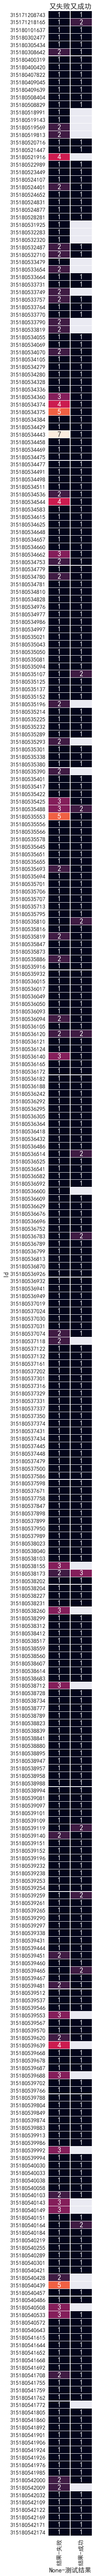

In [31]:
h_sf = len(fail_map)/3.0+5

sns.set(font_scale=1.5)
plt.figure(figsize=(2,h_sf))
plt.rcParams['font.sans-serif']=['SimHei']
plt.title('又失败又成功')
_=sns.heatmap(fail_map, annot=True, linewidths = 0.05, fmt='g', cbar=False)

In [32]:
fully_fail = fail_map[pd.isnull(fail_map['结果','成功'])]
print('完全失败，总数:', len(fully_fail))

完全失败，总数: 32


In [33]:
fully_fail

结果    
测试结果           失败  成功
Id                   
315180518991  1.0 NaN
315180519143  1.0 NaN
315180519569  2.0 NaN
315180519813  2.0 NaN
315180521916  4.0 NaN
315180531925  1.0 NaN
315180532283  1.0 NaN
315180532320  1.0 NaN
315180533479  1.0 NaN
315180533654  2.0 NaN
315180533749  2.0 NaN
315180533790  2.0 NaN
315180533819  2.0 NaN
315180535196  2.0 NaN
315180535293  2.0 NaN
315180535390  2.0 NaN
315180536600  1.0 NaN
315180537118  2.0 NaN
315180538155  3.0 NaN
315180538260  3.0 NaN
315180538712  3.0 NaN
315180539553  3.0 NaN
315180539639  4.0 NaN
315180539688  3.0 NaN
315180539992  3.0 NaN
315180540143  3.0 NaN
315180540149  3.0 NaN
315180540428  2.0 NaN
315180540439  5.0 NaN
315180540508  3.0 NaN
315180541772  1.0 NaN
315180542009  2.0 NaN

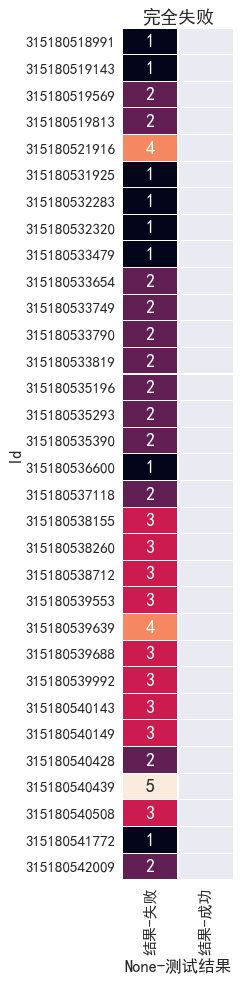

In [34]:
h_f = len(fully_fail)/3.0+5

plt.figure(figsize=(2,h_f))
plt.title('完全失败')
_=sns.heatmap(fully_fail, annot=True, linewidths = 0.05, fmt='g', cbar=False)

In [35]:
print("运行完成日期：", datetime.now())

运行完成日期： 2018-07-16 10:55:41.548668
